# End-to-end Machine Learning Project

**Goal**: Illustrate the main steps of an ML project by building a model that predicts median housing price.


**Steps in the Machine Learning Process**

1. Sample: Take a sample from the dataset; partition into training, validation, and test sets.
2. Explore: Examine the dataset statistically and graphically.
3. Modify: Transform the variables and impute missing values.
4. Model: Fit predictive models.
5. Assess: Compare models using a validation dataset.

In [1]:
# numpy
# pandas
# seaborn
# matplotlib.pyplot
# sklearn.datasets
# sklearn.model_selection

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 

In [2]:
plt.rcParams["figure.figsize"] = [16, 12]
plt.style.use('seaborn-whitegrid')

View the datset description.

In [3]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Framing the problem
Ask questions to help frame the problem:
1. What is our business objective?
    - How does the company expect to use and benefit from the model? Knowing the objective allows you to frame the problem: 
 - Algorithm selection
 - Performance measure for model evaluation
 - Effort to tune the model

2. What does the current solution look like?
    - The current solution will give you a reference for performance and insight into how to solve the problem.

**Our objective**: Predict the median housing price in a given block group.

**Review**
1. Is this a supervised, unsupervised, or reinforcement learning problem?
2. What is the ML task?


### Selecting a performance measure
Root Mean Squared Error (RMSE) is a typical performance measure for regression problems.
 - Indicates the typical prediction error
 - Gives a higher weight for larger errors

\begin{align}
        \mathbf{RMSE} &= \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)}
    \end{align}

Another cost function to consider is the Mean Absolute Error (MAE):

\begin{align}
        \mathbf{MAE} &= \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|
    \end{align}





## Sample



In [6]:
housing = pd.DataFrame(data=fetch_california_housing()['data'], columns=fetch_california_housing()['feature_names'])
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
housing['MedHousVal'] = fetch_california_housing()['target']

In [15]:
housing.MedHousVal

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHousVal, Length: 20640, dtype: float64

### Take a quick look at the data structure
 - Use `DataFrame`'s `head()` method to see the first few rows. 
 - The `info()` method is useful to get a quick description of the data.
 - The `describe()` method shows a summary of attributes.
 - Plotting a histogram of numeric attributes can help data understanding.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


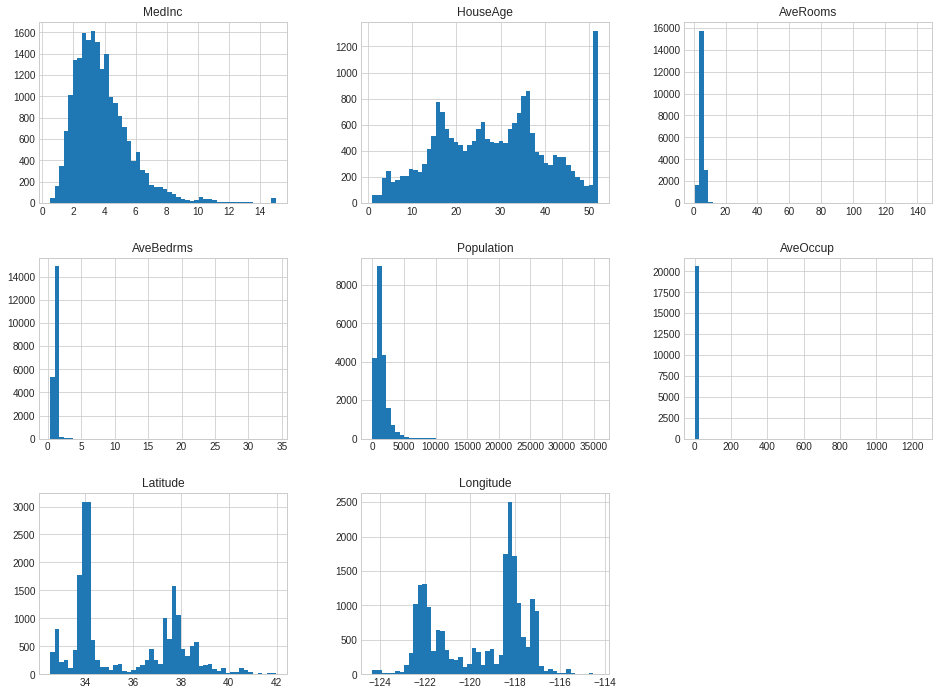

In [12]:
housing.hist(bins=50)

plt.show()

A few things to note:
- The median income attribute may not be expressed in US dollars.
- House age and house value are capped.
- The attributes have very different scales.
- Several of the distributions are tail-heavy.

Before we look at the data further, we need to create a **test set**. 

In [17]:
housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=48)

## Explore

**Purpose**: Exploratory analysis (EDA) is an important part of any data analysis in that it allows further data understanding.
 - Do the data meet your expectations?
 - Data cleaning
 
**Process**: 
1. Generate questions about the data
2. Search for answers by visualizing and transforming the data
3. Through your findings, continue to refine your questions and generate new ones

**Look for**:
 - Variation within variables
 - Covariation between variables
 
#### Quesions
What kind of features do we have?
 - Scale, type, domain...

How is the data quality
 - Relevant, trustworthy?
 - Missing values, outliers, cardinality?

In [18]:
# Make a copy to avoid harming the training set
df = housing_train.copy()

#### Visualizing the Geographical Data

Plotting the Latitude and Longitude using a scatterplot allows us to visualize the block groups.
 - Use the pandas `plot` method; specify `kind='scatter'`.
 - Set the `alpha` (value between 0 and 1) parameter to see areas with a higher density of data points.

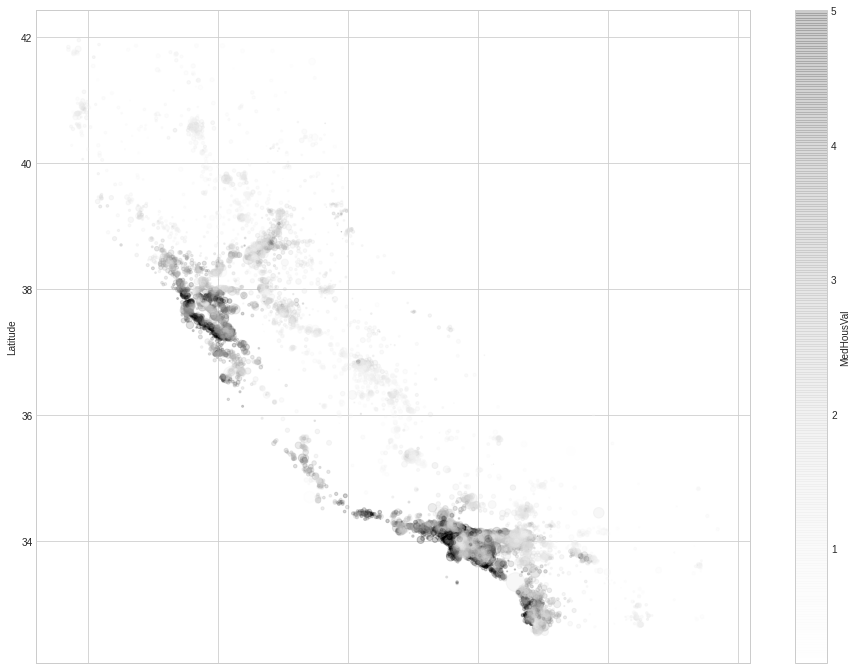

In [22]:
# df.plot(kind='scatter', x="Longitude", y="Latitude")
df.plot(kind='scatter', x="Longitude", y="Latitude", 
        alpha=0.2, s=df.Population/100, c='MedHousVal')
plt.show()

**What relevant information did we gain?**
 - Prices are related to location.
 - Prices may be related to location density.

#### Looking for correlations
We can compute the correlation coefficient between pairs of attributes with the `corr()` method.

In [23]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHousVal
MedInc,1.000000,-0.117510,0.315171,-0.062636,0.000589,0.020734,-0.084287,-0.008764,0.687512
HouseAge,-0.117510,1.000000,-0.151330,-0.075144,-0.291633,0.012648,0.012390,-0.111733,0.111322
AveRooms,0.315171,-0.151330,1.000000,0.856088,-0.073430,-0.006079,0.106618,-0.026437,0.142922
AveBedrms,-0.062636,-0.075144,0.856088,1.000000,-0.065474,-0.006850,0.072345,0.009982,-0.048836
Population,0.000589,-0.291633,-0.073430,-0.065474,1.000000,0.069192,-0.107846,0.099349,-0.028865
AveOccup,0.020734,0.012648,-0.006079,-0.006850,0.069192,1.000000,0.003818,0.000804,-0.022729
Latitude,-0.084287,0.012390,0.106618,0.072345,-0.107846,0.003818,1.000000,-0.924404,-0.146315
Longitude,-0.008764,-0.111733,-0.026437,0.009982,0.099349,0.000804,-0.924404,1.000000,-0.042616
MedHousVal,0.687512,0.111322,0.142922,-0.048836,-0.028865,-0.022729,-0.146315,-0.042616,1.000000


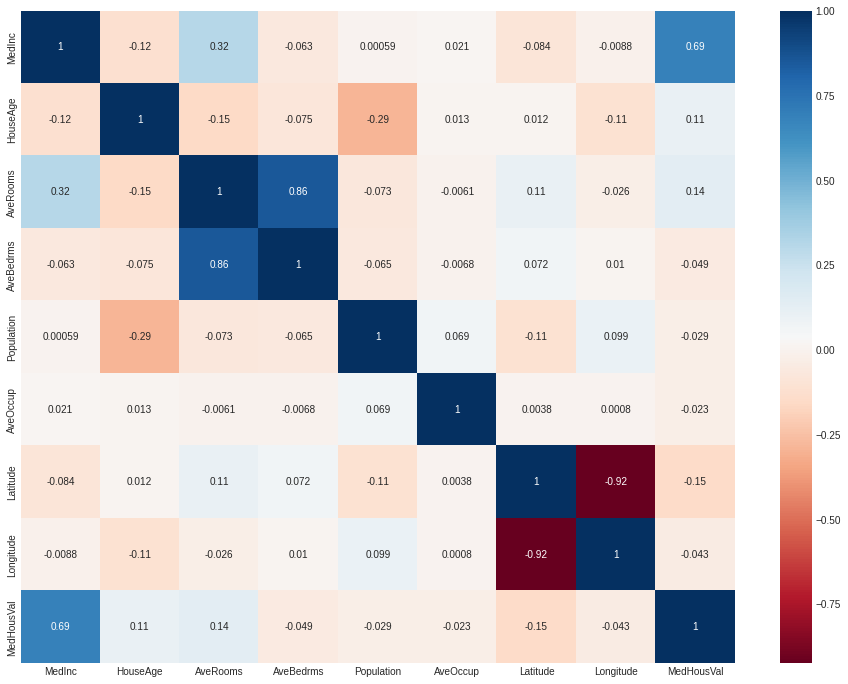

In [24]:
sns.heatmap(data=df.corr(), annot=True, cmap='RdBu')

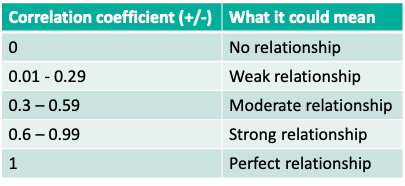
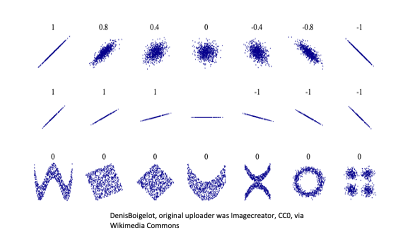

## Data preparation

#### Missing Values
Most ML algorithms are not robust to missing values. We need to find and treat missing values prior to training. Typical options are:
1. Drop observations with missing values.
2. Drop attributes with missing values.
3. Set the missing value to some value (0, mean, median, etc.).

> Impute: to infer missing values from the known part of the data.

If imputing missing values, compute the value (e.g., median) on the training data, and save that value to use on the test set.

In [25]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedHousVal    0
dtype: int64

Alternatively, use `scikit-learn`'s built-in imputer methods.

https://scikit-learn.org/stable/modules/impute.html

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')

In [28]:
imp.fit(df)

SimpleImputer(strategy='median')

In [29]:
print(imp.statistics_)

[ 3.54860000e+00  2.90000000e+01  5.23420074e+00  1.04827066e+00
  1.16500000e+03  2.81767169e+00  3.42500000e+01 -1.18500000e+02
  1.80900000e+00]


In [30]:
df.median()

MedInc           3.548600
HouseAge        29.000000
AveRooms         5.234201
AveBedrms        1.048271
Population    1165.000000
AveOccup         2.817672
Latitude        34.250000
Longitude     -118.500000
MedHousVal       1.809000
dtype: float64

#### Scikit-learn

`Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

**Estimators**: `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called _estimators_. Any object that can estimate parameters based on a dataset is an estimator. 
 - Estimation is performed by the `fit(X, y)` method.
 - _Hyperparameters_ are any other parameters (other than the data) needed to guide the estimation process.

**Transformers**: Estimators that can also transform a dataset, e.g. `imputer`.
 - A transformation is performed by the `transform()` method.
 - The input is the dataset; the transformed dataset is returned.
 - All transformers also have a convenience method called `fit_transform()` that is equivalent to calling `fit()` then `transform()`.
 
**Predictors**: Estimators that are capable of making predictions, e.g. `LinearRegression`.
 - A _predictor_ has a `predict()` method that takes a dataset of instances and returns a dataset of corresponding predictions.
 - It also has a `score()` method that measures the quality of the predictions. 

**Pipelines**: There are often several pre-processing steps that need to be executed in a specific order. The pipeline allows transformers and predictors to be combined together in a single object.

**Model evaluation**: After training a predictor, we need to evaluate how well it generalizes to unseen data. `Scikit-learn` provides a built-in _cross validation_ procedure.

**Automatic parameter searches**: The generalization power of an estimator often critically depends on a few _hyperparameters_. `Scikit-learn` provides tools to automatically find the best paramenter combinations, including exhaustive grid search and randomized search functions.


#### Feature Engineering

**Feature transformation**: transforming data into its optimal format.

_Feature Scaling_: 
 - Machine learning algorithms often do not perform well when input numerical attributes have very different scales.
 - Feature scaling is one of the most important components of data preparation. 
 
 There are two common methods:
    1. Min-max scaling (normalization)
        - Values are shifted and rescaled so they range from 0 to 1.
        - Subtract the minimum value, and divide by the range (max - min). 
    2. Standardization
        - Values are transformed so they always have a zero mean and unit variance.
        - Subtract the mean value, then divide by the standard deviation.
        - Does not bound values.

    The corresponding `Scikit-learn` transformers are `MinMaxScaler` and `StandardScaler`.

    > **Remember to fit the scalers to the training data only to avoid data leakage.**

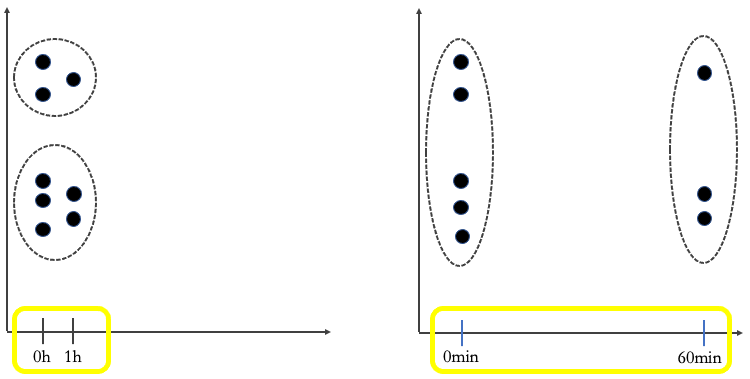

_Dummy Coding_: categorical features have a finite set of values that cannot be ordered:   
- Gender: male, female
- Color: red, yellow, green

Most ML techniques require numeric imput, so categorical data must be transformed.

**One-hot encoding** is a common method: create new binary features fore each unique value within a categorical feature.

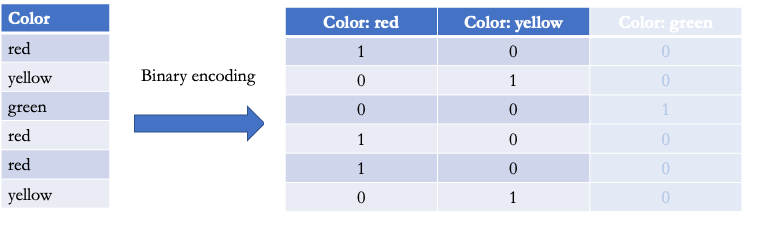


It is often suggested to encode columns into n-1 new columns to avoid co-linearity in the input matrix. Such functionality is useful, for example, when using non-regularized regression (LinearRegression), since co-linearity would cause the covariance matrix to be non-invertible.


**Feature construction**: It can be useful to combine attributes to create more relevant attributs. 

_Feature Selection_: refers to techniques to choose a subset of features that is as small as possible while still sufficient for analysis.

- Removing irrelevant features
- Removing redundant features

Approaches:
- Remove one of two highly correlated features.
- Remove predictors that are not related to the target.
- More advanced: regularization, automatic selection (trees), feature importance

## Select and Train a Model: Simple Linear Regression

In this notebook, we will train a Linear Regression model.

**Linear Regression**: Given a collection of n observations, Linear Regression seeks to find the linear function which best explains the observations.

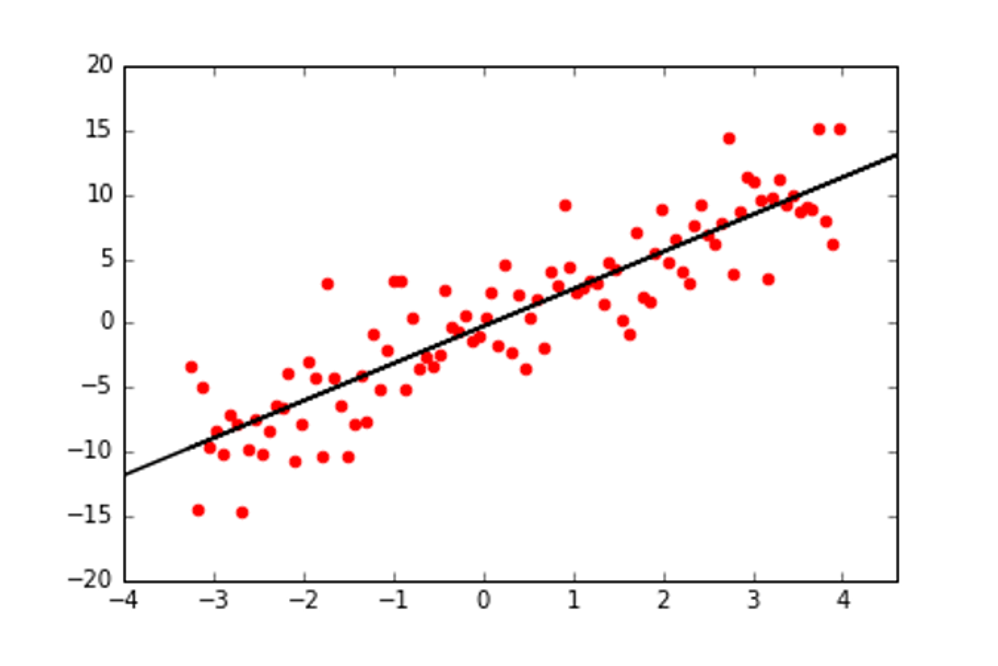



**Characteristics**
 - Easy to build
 - Straightforward to interpret
 - Often perform well in practice
 - Often used as a baseline model

**Form**:
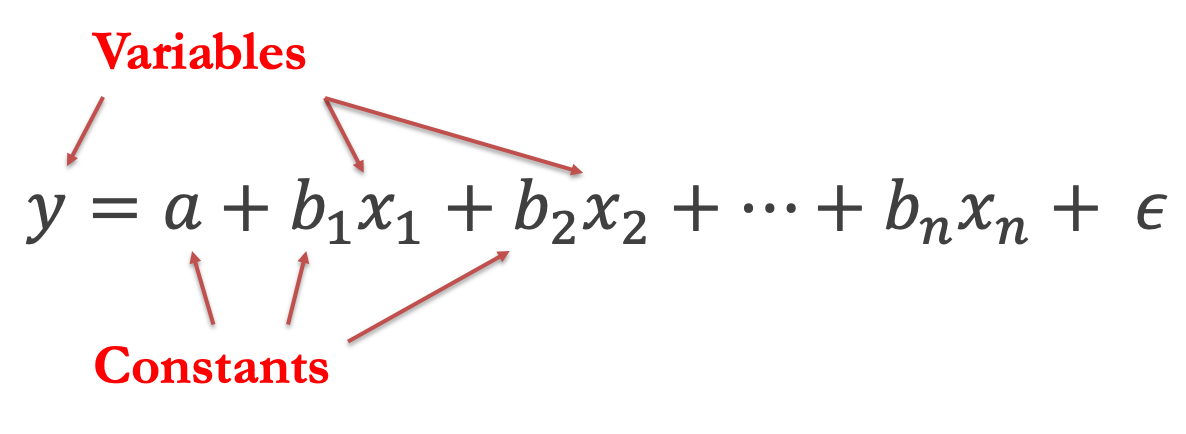


**Interpretation**: The regression slope tells you the expected change in the dependent variable y when the independent variable x changes one unit.

**Training the model**

* Objective: find values for coefficients that minimize the performance meausure (RMSE). 
* Minimize 
\begin{align}
        \mathbf{RMSE} &= \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)}
    \end{align}

## Multiple Linear Regression

### Transformation Pipelines
Your data may require many transformation steps which need to be executed in a particular order. `Pipeline`s are he most common tool used to chain estimators which helps ensure transformations occur in the correct order. 

Characteristics include: 

* Helps with sequences of data transformations. This is useful because there may be many different transformations on the data that must be executed in the same order each time. 
* Also remembers certains values from the training data, like imputation values and standardization values, that will be used to transform the test data.

Note: all estimators in a pipeline, except the last one, must be transformers (i.e., must have a `transform` method). The last estimator may be any type (transformer, classifier, etc.).

### Cross-Validation
_k-fold cross-validation_ randomly splits the training set into _k_ distinct subsets, called _folds_, then trains and evaluates the model _k_ times, picking a different fold for evaluation every time and training on the remaining _k-1_ folds.

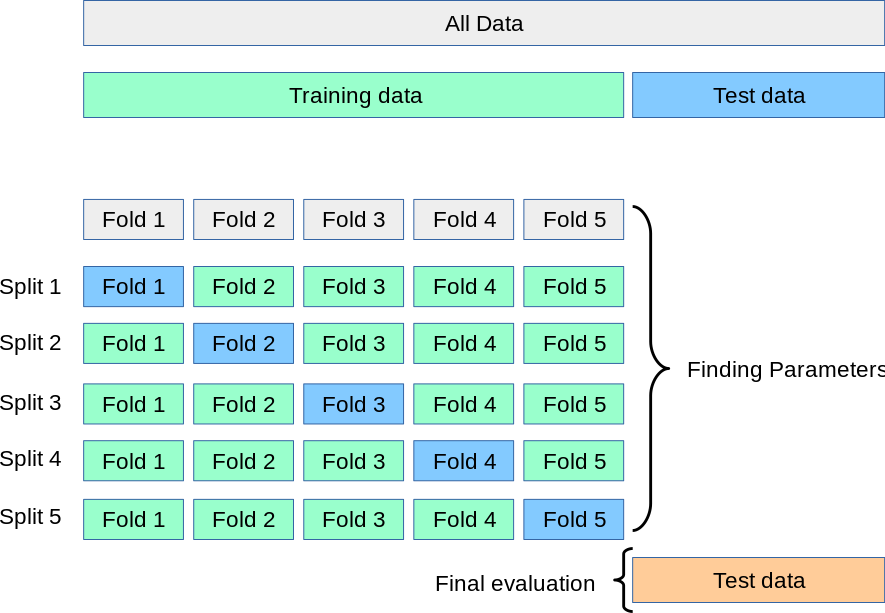

Multiple Metric Evaluation

## LASSO (Least Absolute Shrinkage and Selection Operator)

**Lasso** is a linear model that estimates sparse coefficients.
 - Prefers solutions with fewer non-zero coefficients.
 - Consists of a linear model with an added regularization term.

\begin{align}
        minimize: \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p |β_j|
    \end{align}



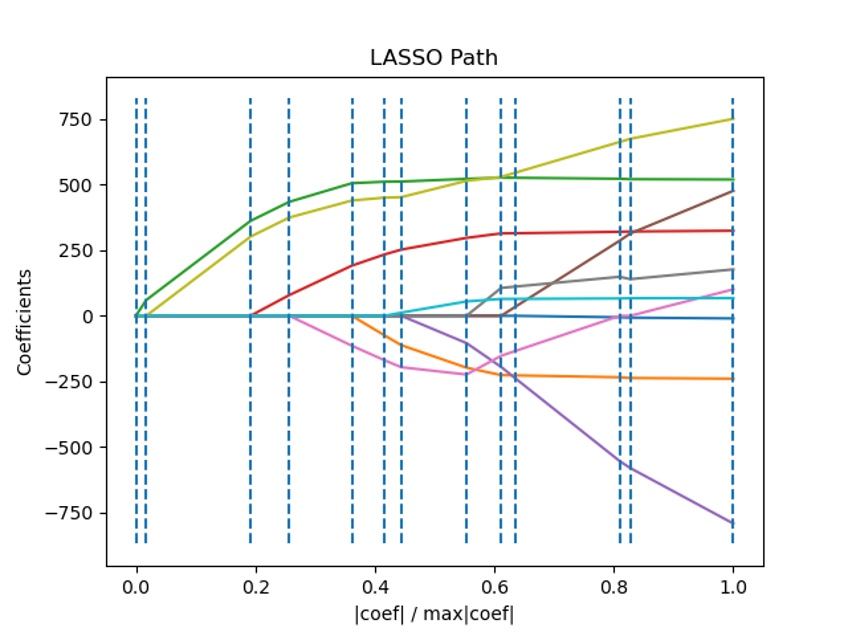

Print the value for alpha (chosen by cross validation) and the coefficients.

## Instance-based approach: K-Nearest Neighbors
Find similar records in the training data, then use those neighbors to predict (by averaging) or classify (by voting) new records. 
* K is specified by the user.
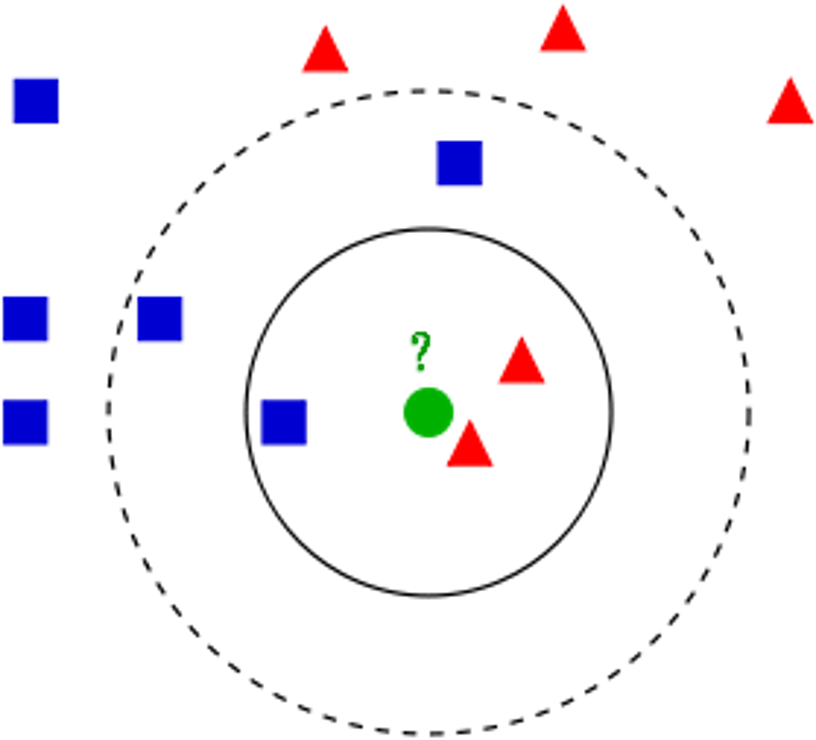

We can improve the result slightly by weighting the neighborhood points based on distance. Closer neighbors have a greater influence on the query point.

#### Choosing the value of _k_
* If _k_ is too low, we may be fitting the noise of the data.
* If _k_ is too high, we may not capture the local structure of the data (one of the method's main advantages).

So how is _k_ chosen? Choose the value for _k_ **with the best performance**. 

### Grid Search
Exhaustively generate candidates from a grid of user-specified parameter values.